In [1]:
from matplotlib import pyplot as plt
import torch
import torch.functional as F
import biosupcon as tools
import albumentations as A
import albumentations.pytorch as AT
import pandas as pd
scaler = torch.cuda.amp.GradScaler()

/home/agporto/miniconda3/envs/soup/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
ckpt_pretrained = './weights/effnetb4_damselfly_stage1/epoch42'
data_dir = '/home/agporto/Dropbox/Year_2023/morph_moritz_aligned/dataset2/'
valid_transforms = A.Compose([A.Resize(512, 512), A.Normalize(), AT.ToTensorV2()])

transform_dict = {
            "train_transforms": valid_transforms,
            'valid_transforms': valid_transforms}

num_classes = 4
batch_sizes = {
    "train_batch_size": 5,
    'valid_batch_size': 5
}
num_workers = 16
backbone = 'timm_tf_efficientnet_b0'
stage = 'first'

loaders = tools.utils.build_loaders(data_dir, transform_dict, batch_sizes, num_workers, second_stage=(stage == 'second'))
    

In [11]:
model = tools.utils.build_model(backbone, second_stage=(stage == 'second'), num_classes=num_classes, ckpt_pretrained=ckpt_pretrained).cuda()
model.use_projection_head(False)
model.eval()




tf_efficientnet_b0


SupConModel(
  (encoder): Sequential(
    (0): Conv2dSame(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (1): BatchNormAct2d(
      32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (2): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNormAct2d(
            32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): SiLU(inplace=True)
          )
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (act1): SiLU(inplace=True)
            (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (gate): Sigmoid()
          )
          (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=Fal

In [12]:

embeddings_train, labels_train = tools.utils.compute_embeddings(loaders['valid_loader'], model, scaler)
paths_train = [item[0] for item in loaders['valid_loader'].dataset.imgs]
reduced_data, colnames, _ = tools.vis.embbedings_dimension_reductions(embeddings_train)

vis_x_train = reduced_data[:,2]
vis_y_train = reduced_data[:,3]

df = pd.DataFrame(reduced_data, columns=colnames)
df['paths'] = paths_train
df['class'] = labels_train
df['class_str']=[item[0].split('/')[-2] for item in loaders['valid_loader'].dataset.imgs]

/home/agporto/miniconda3/envs/soup/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [13]:
tools.vis.bokeh_plot(df)

Column(id='1824', ...)

In [14]:

# import required libraries
import numpy as np
from numpy.linalg import norm
cosine = np.dot(embeddings_train,embeddings_train.T)


In [ ]:

#pd.DataFrame(cosine).to_csv('cosine.csv')

In [15]:
pd.DataFrame(cosine)

0         1         2         3         4         5         6    \
0    1.000000  0.884108  0.854115  0.867191  0.622619  0.877035  0.841699   
1    0.884108  1.000000  0.795585  0.835659  0.619831  0.812180  0.815900   
2    0.854115  0.795585  1.000000  0.861756  0.652486  0.877676  0.836036   
3    0.867191  0.835659  0.861756  1.000000  0.661240  0.850054  0.833283   
4    0.622619  0.619831  0.652486  0.661240  1.000000  0.589762  0.636372   
..        ...       ...       ...       ...       ...       ...       ...   
195  0.761452  0.709473  0.744066  0.747333  0.648658  0.778647  0.752007   
196  0.749891  0.685065  0.709521  0.728678  0.614015  0.730692  0.734071   
197  0.756831  0.680209  0.746006  0.727288  0.566456  0.784073  0.723750   
198  0.816352  0.738358  0.773095  0.754197  0.628707  0.816854  0.769020   
199  0.747639  0.665287  0.716768  0.726646  0.596723  0.750322  0.694186   

          7         8         9    ...       190       191       192  \
0    0.840980  0.860833  0.842215  ...  0.778357  0.736479  0.768425   
1    0.813658  0.871269  0.817500  ...  0.736549  0.657875  0.691922   
2    0.826163  0.825262  0.808565  ...  0.763164  0.706329  0.739069   
3    0.833945  0.832819  0.811481  ...  0.732145  0.712498  0.732609   
4    0.604006  0.663189  0.625427  ...  0.658467  0.621630  0.642559   
..        ...       ...       ...  ...       ...       ...       ...   
195  0.702839  0.770447  0.782604  ...  0.885186  0.835175  0.861197   
196  0.685925  0.710344  0.750608  ...  0.835084  0.899754  0.858304   
197  0.705274  0.716960  0.781915  ...  0.859104  0.860495  0.869835   
198  0.734488  0.777682  0.804754  ...  0.861699  0.893425  0.882758   
199  0.673595  0.701297  0.767668  ...  0.786910  0.899014  0.876899   

          193       194       195       196       197       198       199  
0    0.727683  0.797310  0.761452  0.749891  0.756831  0.816352  0.747639  
1    0.670220  0.725009  0.709473  0.685065  0.680209  0.738358  0.665287  
2    0.732344  0.757183  0.744066  0.709521  0.746006  0.773095  0.716768  
3    0.721465  0.729843  0.747333  0.728678  0.727288  0.754197  0.726646  
4    0.629986  0.623658  0.648658  0.614015  0.566456  0.628707  0.596723  
..        ...       ...       ...       ...       ...       ...       ...  
195  0.853114  0.832034  1.000000  0.854150  0.851957  0.848088  0.812444  
196  0.853337  0.837455  0.854150  1.000000  0.854229  0.876709  0.859985  
197  0.822386  0.856017  0.851957  0.854229  1.000000  0.863178  0.814701  
198  0.862024  0.884205  0.848088  0.876709  0.863178  1.000000  0.847827  
199  0.891741  0.773787  0.812444  0.859985  0.814701  0.847827  1.000000  

[200 rows x 200 columns]

In [16]:
import cv2
import numpy as np
img_path = '/home/agporto/Dropbox/Year_2023/morph_moritz_aligned/biosup/val/androchrome/2016_07_03_time_13_22_30_311000_roi_04.jpg'


In [17]:
img = cv2.imread( img_path, 1)
img = cv2.resize(img,(1024,1024))
img = np.float32(img) / 255
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
input_img = tools.vis.preprocess_image(img)

In [ ]:
tools.vis.visualize_filters(model.encoder, 'encoder.4.weight', max_filters = 25)

In [ ]:
for param in model.named_parameters():
    print(param[0])

In [ ]:
tools.vis.visualize_activations(model.encoder, model.encoder[0], img, device='cpu')

In [ ]:
tools.vis.maximally_activated_patches(model.encoder, img, patch_size=512, device='cpu')

In [ ]:
tools.vis.saliency_map(model.encoder,img)

tf_efficientnet_b0
Epoch: 50 Confidence score for class 3: 0.0006996457232162356
Epoch: 100 Confidence score for class 3: 0.000700626871548593
Epoch: 150 Confidence score for class 3: 0.0007006882806308568
Epoch: 200 Confidence score for class 3: 0.0007006891537457705
Epoch: 250 Confidence score for class 3: 0.0007007125532254577
Epoch: 300 Confidence score for class 3: 0.0007006959640420973
Epoch: 350 Confidence score for class 3: 0.0007007187814451754
Epoch: 400 Confidence score for class 3: 0.0007007141248323023
Epoch: 450 Confidence score for class 3: 0.0007007144740782678
Epoch: 500 Confidence score for class 3: 0.0007006985251791775


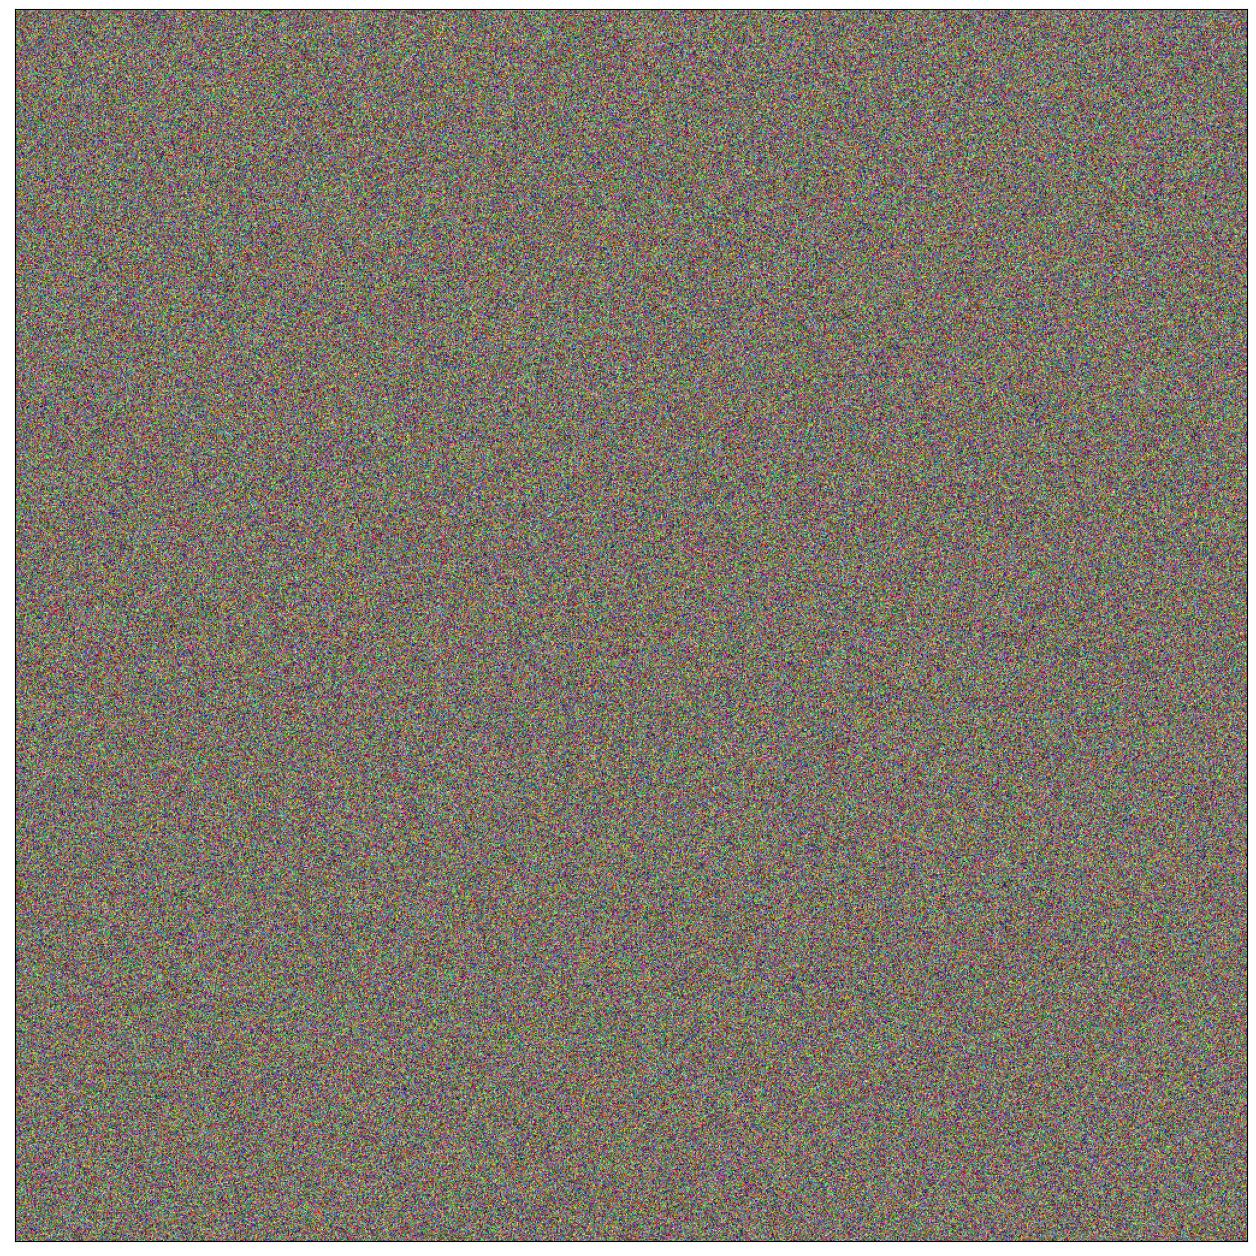

In [19]:
ckpt_pretrained = './weights/effnetb4_damselfly_stage2/swa'
model = tools.utils.build_model(backbone, second_stage='second', num_classes=4, ckpt_pretrained=ckpt_pretrained).cuda()
synthetic_image = tools.vis.generate_image(model = model.encoder, target_class = 3, epochs = 500, min_prob = 0.9, lr = 1, weight_decay = 1e-4,
                        step_size = 100, gamma = 0.1, noise_size=1024)

In [ ]:
modules = [model.encoder[0],model.encoder[1], model.encoder[2]]
tools.vis.feature_inversion(model.encoder, modules,  img, 100, 5e-5)

tf_efficientnet_b0


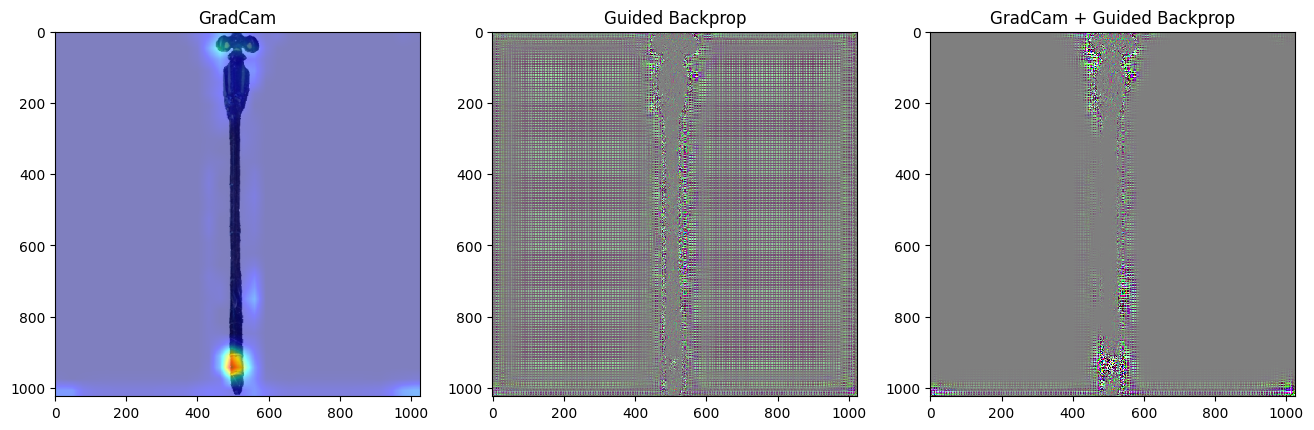

In [20]:
ckpt_pretrained = './weights/effnetb4_damselfly_stage2/swa'
model = tools.utils.build_model(backbone, second_stage='second', num_classes=4, ckpt_pretrained=ckpt_pretrained).cuda()

tools.vis.grad_cam(model, model.encoder,img,target_layer=["4"], target_category= None)

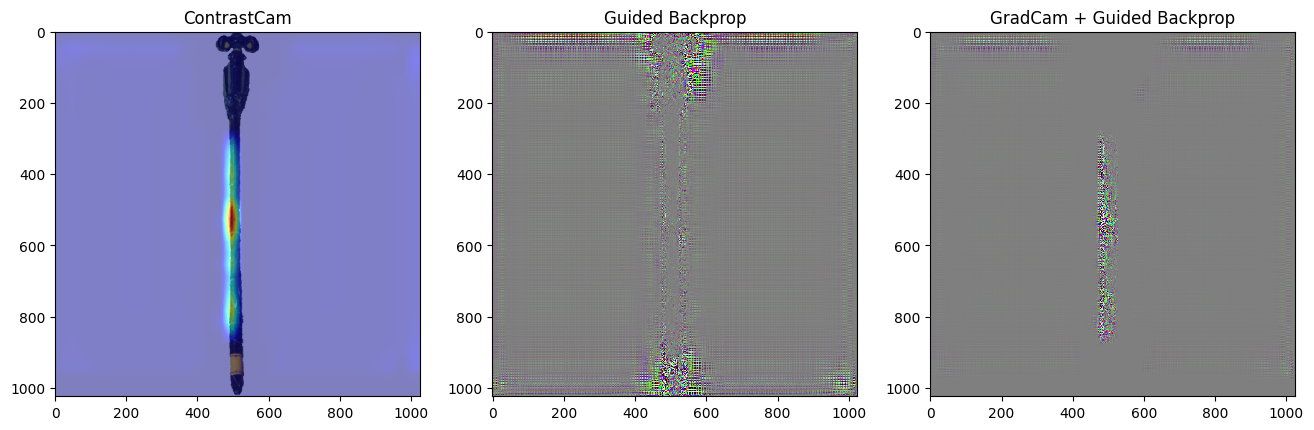

In [21]:


tools.vis.contrast_cam(model, model.encoder,img,target_layer=["4"], target_category= 3)

In [ ]:
dream = tools.vis.deep_dream(model = model, module = model.encoder[0], img= img, epochs = 300, lr = 4)